In [0]:
import pandas as pd

In [0]:
df=pd.read_csv("http://iali.in/datasets/Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.shape

(400, 5)

In [0]:
X=df[['Age','EstimatedSalary']]
Y=df['Purchased']

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [8]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
prediction=model.predict(X_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,prediction)

0.9

In [11]:
from sklearn.metrics import classification_report
classificationReport= classification_report(Y_test, prediction, target_names=['Not Purchased','Purchased'], )
print(classificationReport)

               precision    recall  f1-score   support

Not Purchased       0.95      0.91      0.93        58
    Purchased       0.79      0.86      0.83        22

     accuracy                           0.90        80
    macro avg       0.87      0.89      0.88        80
 weighted avg       0.90      0.90      0.90        80



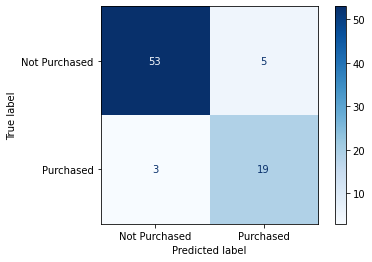

In [12]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=['Not Purchased','Purchased'],
                                 cmap=plt.cm.Blues)

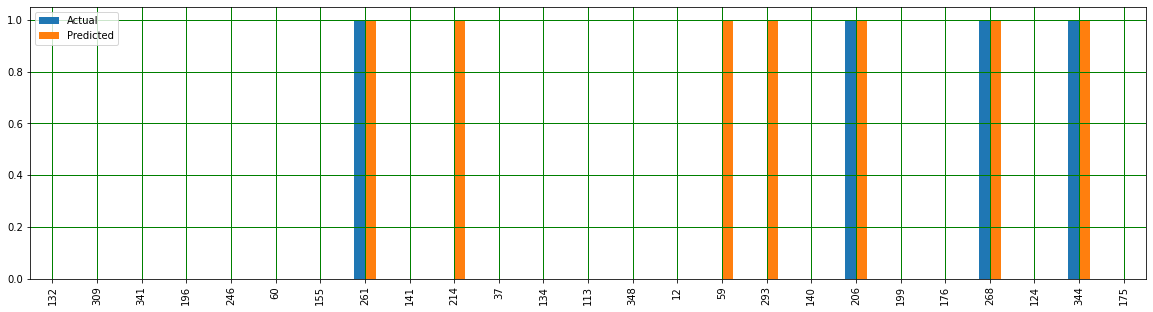

In [13]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': prediction}).head(25)
df1.plot(kind='bar',figsize=(20,5))
plt.grid(which='major', linestyle='-', linewidth='1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='1', color='black')
plt.show()

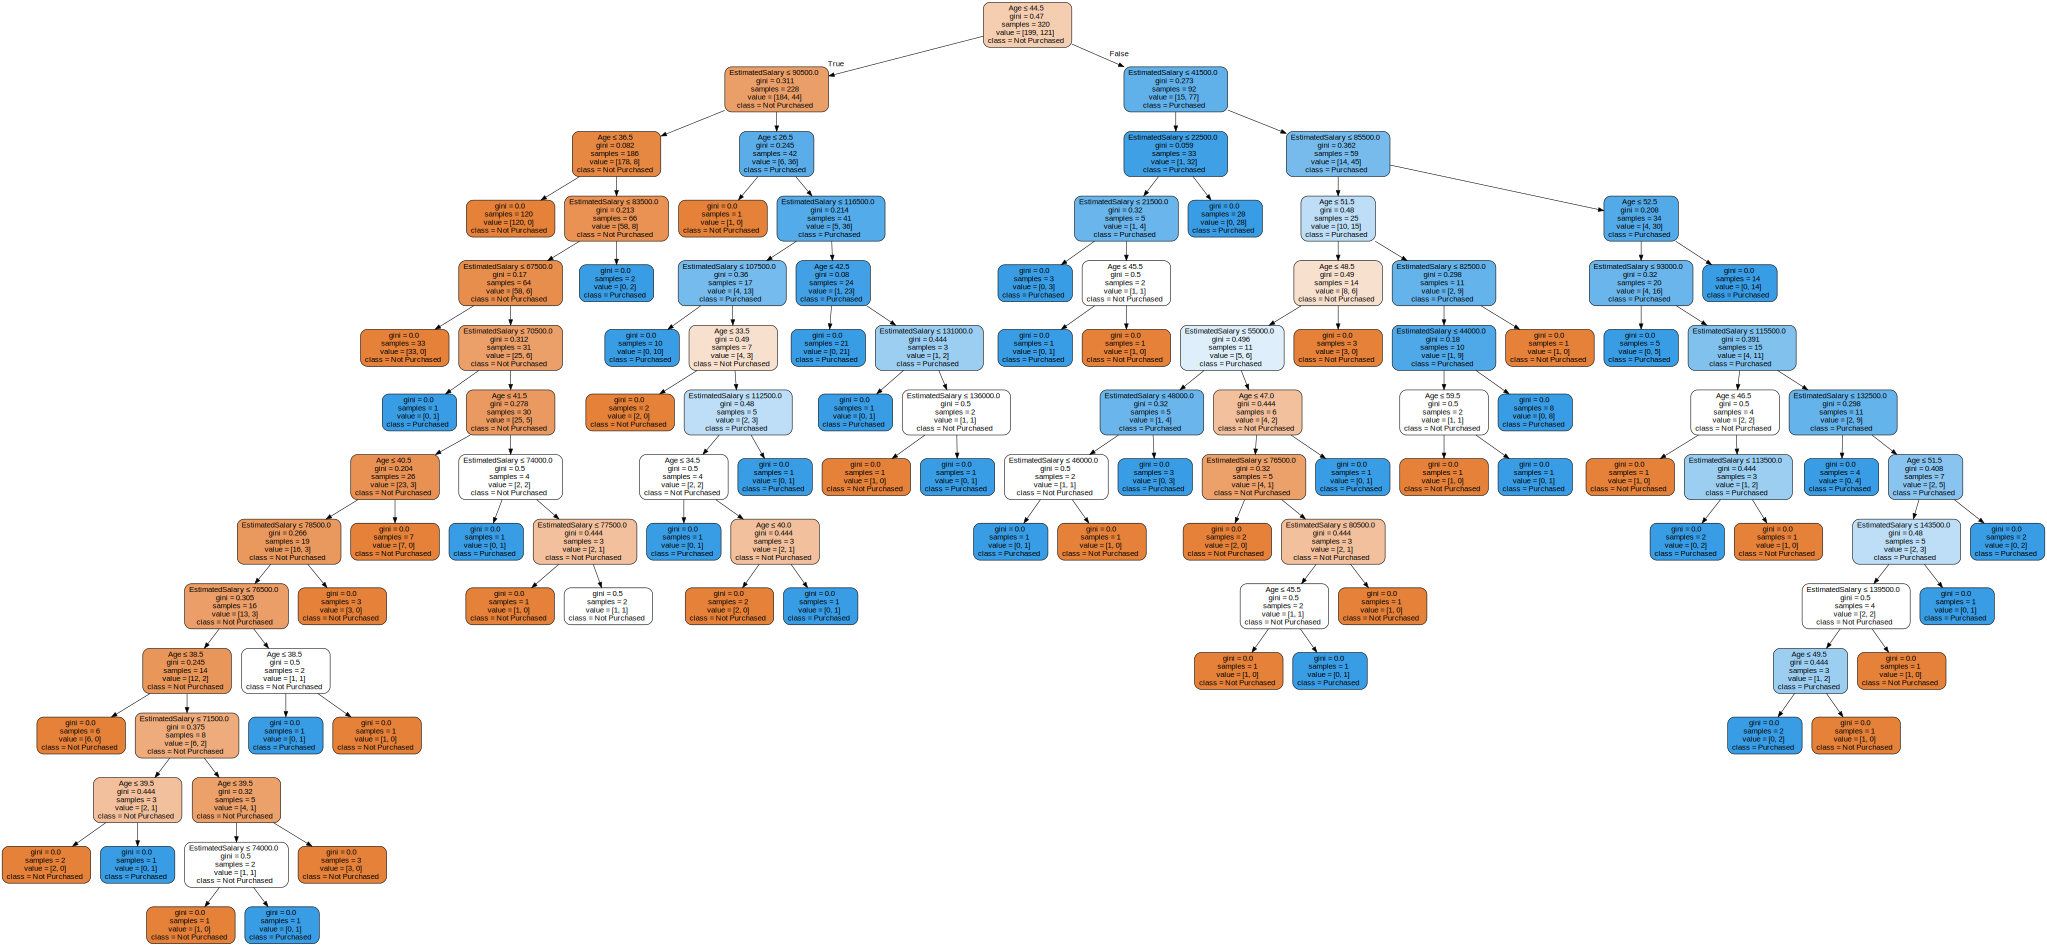

In [14]:
import graphviz 
from sklearn import tree


dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=['Age','EstimatedSalary'],
                    class_names=['Not Purchased','Purchased'],
                     filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph